<a href="https://colab.research.google.com/github/UbossDK/Cosmology_2021_21/blob/main/cosmo_ex03_kramer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [1]:
from astropy import constants as const
from astropy import units as u
from astropy.table import Table
from astropy.cosmology import Planck18 as cosmo
from astropy.cosmology import FlatLambdaCDM, LambdaCDM

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.integrate import quad
from scipy.optimize import minimize
import scipy.optimize
from scipy.optimize import curve_fit
from scipy.stats.stats import pearsonr
from scipy.optimize import minimize
from scipy.stats import chi2

from IPython.display import Latex
from IPython.display import display, Math, Markdown

# Problem 1: Should H in fact be called the Lemaître Constant?

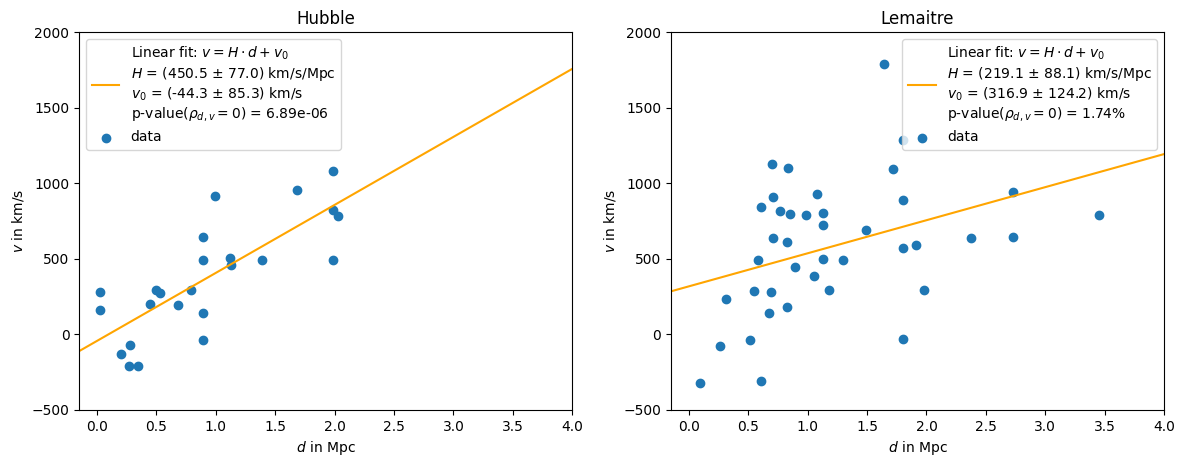

In [2]:
# Read data from CSV files
data_hub = pd.read_csv("velocities_hubble.csv")
data_lem = pd.read_csv("velocities_lemaitre.csv")
# Remove white spaces from header
data_hub = data_hub.rename(columns=lambda x: x.strip())
data_lem = data_lem.rename(columns=lambda x: x.strip())

# Linear function
def lin_func(x, a, b):
    return a*x + b

# Fit data to linear function
popt_hub, pcov_hub = scipy.optimize.curve_fit(lin_func, data_hub["distance"], data_hub["velocity"])
popt_hub_err = np.sqrt(np.diag(pcov_hub))
popt_lem, pcov_lem = scipy.optimize.curve_fit(lin_func, data_lem["distance"], data_lem["velocity"])
popt_lem_err = np.sqrt(np.diag(pcov_lem))

# Calculate p-value for hypothesis of no corrleation between distance and velocity
p_value_hub = pearsonr(data_hub["distance"], data_hub["velocity"])
p_value_lem = pearsonr(data_lem["distance"], data_lem["velocity"])

# Plot everything
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5), dpi=100)
xlim = (-0.15, 4)
ylim= (-500, 2000)
x_space = np.linspace(-0.15, 4, 100)

# Hubble data and fit
ax1.set_title("Hubble")
ax1.scatter(data_hub["distance"], data_hub["velocity"], label="data")
label_hub = (r"Linear fit: $v = H \cdot d + v_0$"
             + "\n" + "$H$ = ({:.1f} $\pm$ {:.1f}) km/s/Mpc".format(popt_hub[0], popt_hub_err[0])
             + "\n" + "$v_0$ = ({:.1f} $\pm$ {:.1f}) km/s".format(popt_hub[1], popt_hub_err[1])
             + "\n" + r"p-value($\rho_{d,v}=0)$ = " + "{:.2e}".format(p_value_hub[1]))
ax1.plot(x_space, lin_func(x_space, popt_hub[0], popt_hub[1]),
         label=label_hub, color="orange")
ax1.set_xlabel(r"$d$ in Mpc")
ax1.set_ylabel(r"$v$ in km/s")
ax1.set_xlim(xlim)
ax1.set_ylim(ylim)
ax1.legend()

# Lemaitre data and fit
ax2.set_title("Lemaitre")
ax2.scatter(data_lem["distance"], data_lem["velocity"], label="data")
label_lem = (r"Linear fit: $v = H \cdot d + v_0$"
             + "\n" + "$H$ = ({:.1f} $\pm$ {:.1f}) km/s/Mpc".format(popt_lem[0], popt_lem_err[0])
             + "\n" + "$v_0$ = ({:.1f} $\pm$ {:.1f}) km/s".format(popt_lem[1], popt_lem_err[1])
             + "\n" + r"p-value($\rho_{d,v}=0)$ = " + "{:.2f}%".format(p_value_lem[1]*100))
ax2.plot(x_space, lin_func(x_space, popt_lem[0], popt_lem[1]),
         label=label_lem, color="orange")
ax2.set_xlabel(r"$d$ in Mpc")
ax2.set_ylabel(r"$v$ in km/s")
ax2.set_xlim(xlim)
ax2.set_ylim(ylim)
ax2.legend()

plt.show()

The p-value for the hypothesis that the correlation coeffecient between distance and velocity is equal to zero ($\rho_{d,v}$ = 0) is calculated, i.e. that there is no linear relation.

By today's standards the data of Lemaitre does not even represent evidence (3 $\sigma$ ~ $2.7×10^{-3}$) for a (cor)relation between distance and velocity.

Hubble's data is close to 4.5$\sigma$ ~ $6.8×10^{-6}$ and therefore almost an  observation (5$\sigma$ ~ $5.7×10^{-7}$). The best linear fit value for $H$ is an order of magnitude too high though.

Should H in fact be called the Lemaître Constant?: No, not from the data of the CSV files.
 

#Problem 2: Evolution of photon and relativistic densities

## i)



Density and Omega for each component are related by critical density:
$$\rho_i^0 = \Omega_i^0 \cdot \rho_{crit}^0$$

Assume baryons to be only protons, so:

$$n_b = \frac{\rho_b^0}{m_pc^2}$$

Most relevant contribution to photons is the CMB
-> approximate photon number density by CMB photons.
Mean photon energy of black body spectrum:

$$ E_{\gamma}^{mean} = 2.7 \cdot k_b T$$

So:

$$ n_{\gamma} = \frac{\rho_{\gamma}^0}{E_{\gamma}^{mean}}$$

Photon to baryon ratio:

$$\eta = \frac{n_{\gamma}}{n_b}$$

In [3]:
# Critical density and Omega values
rho_crit = 8.62e-27 *u.kg * (u.m)**(-3)

omega_M = 0.301
omega_bary = 0.0497
omega_gamma = 5.51e-5
omega_lambda = 1 - (omega_M - omega_gamma)

# Translate Omega to density for each component
rho_M = omega_M * rho_crit
rho_bary = omega_bary * rho_crit
rho_gamma = omega_gamma * rho_crit
  # print("rho_M =", rho_M)
  # print("rho_bary =", rho_bary)
  # print("rho_gamma =", rho_gamma)

# Baryon number density
n_bary = rho_bary / const.m_p
  # print("m_bary ~ m_proton =", const.m_p)
  # print("n_bary =", n_bary)

# Approximate rho_gamma with most relevant contribution: CMB
# CMB temperature
T_CMB = 2.725 * u.K

# Mean photon energy of a black body spectrum with a particular temperature
E_mean_gamma = 2.7 *const.k_B * T_CMB
m_gamma = (E_mean_gamma / (const.c)**2).to("kg")
  # print("m_gamma =", m_gamma)

# Photon number density
n_gamma = rho_gamma / m_gamma
  # print("n_gamma =", n_gamma)

# Photon to baryon ratio
eta = n_gamma / n_bary
print("eta = {:.3e}".format(eta))
print("1/eta = {:.3e}".format(1/eta))

eta = 1.641e+09
1/eta = 6.095e-10


## ii)

The number of CMB photons that were once emitted as well as the number of baryons that existed at this "point in time" do not change under the expansion of the universe. (neglecting stellar activity or similar processes)

So the ratio of these numbers (or number densities) over the entire universe should also not change.

The evolution with redshift or scale factor says:
$\rho_{\gamma} = \rho_{\gamma}^0 / a^{4}$ and $\rho_{b} = \rho_{b}^0 / a^{3}$.
Since the temperature of the CMB, that was used to calculate the photon number density, also changes with the scale factor: $T(a) = T_0 /a$.
Putting these into the equations from the previous task one finds for varying scale factor (or redshift): $\eta =const$, which proofs the earlier claim.

## iii)

To find the redshift $z'$ where one density becomes larger than the other it is required that:

$$\rho_M(z') = \rho_{\gamma}(z')$$

This gives:

$$\rho_M^0 \cdot (1+z')^3 = \rho_{\gamma}^0 \cdot (1+z')^4$$

So:

$$z' = \frac{\rho_M^0}{\rho_{\gamma}^0} - 1$$


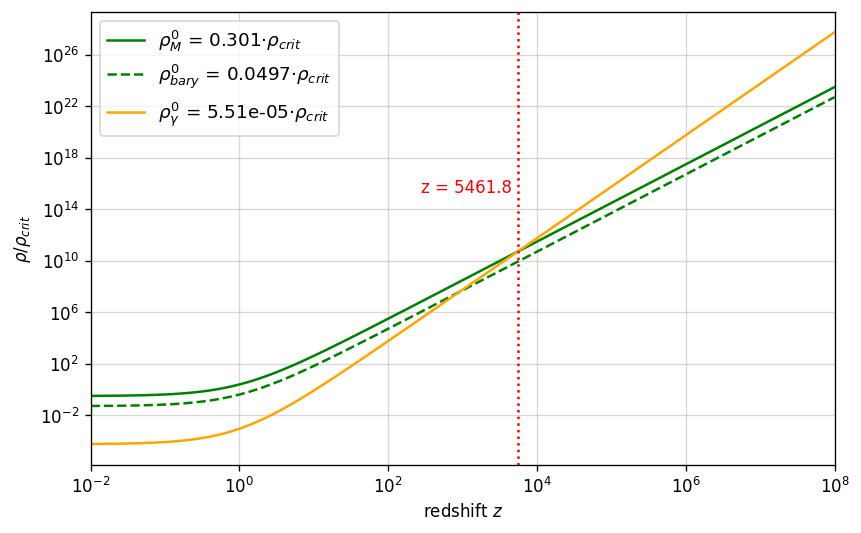

In [4]:
# Dependence how the component densities scale with redshift z
def rho_M_func(z):
    return rho_M * (1+z)**3

def rho_bary_func(z):
    return rho_bary * (1+z)**3

def rho_gamma_func(z):
    return rho_gamma * (1+z)**4


# Calculate point where one compinent starts to dominate
z_change = (rho_M / rho_gamma) - 1

# Plot the evolution of the densities
fig = plt.figure(figsize=(8, 5), dpi=120)

  # print(rho_M, rho_gamma)
z_space = np.logspace(-2, 8, 1000)

plt.plot(z_space, rho_M_func(z_space)/rho_crit.value,
         label=r"$\rho_{M}^0$ = " + "{}".format(omega_M) + r"$\cdot \rho_{crit}$",
         linestyle="-", color="green")
plt.plot(z_space, rho_bary_func(z_space)/rho_crit.value,
         label=r"$\rho_{bary}^0$ = " + r"{}".format(omega_bary) + r"$\cdot \rho_{crit}$",
         linestyle="--", color="green")
plt.plot(z_space, rho_gamma_func(z_space)/rho_crit.value,
         label=r"$\rho_{\gamma}^0$ = " + "{}".format(omega_gamma) + r"$\cdot \rho_{crit}$",
         linestyle="-", color="orange")
plt.axvline(z_change, linestyle=":", color="red")
plt.annotate("z = {:.1f}".format(z_change), (z_change/20, 2e15), color="red")
plt.xlabel(r"redshift $z$")
plt.ylabel(r"$\rho / \rho_{crit}$")
plt.legend(fontsize=11)
plt.loglog(basex=10,basey=10)
plt.grid(alpha=0.5)
plt.xlim(1e-2, 1e8)
plt.show()

## iv)

$\rho_{\gamma}$    -->    $\rho_{rel} = \rho_{\gamma} + \rho_{neutrino}$ 

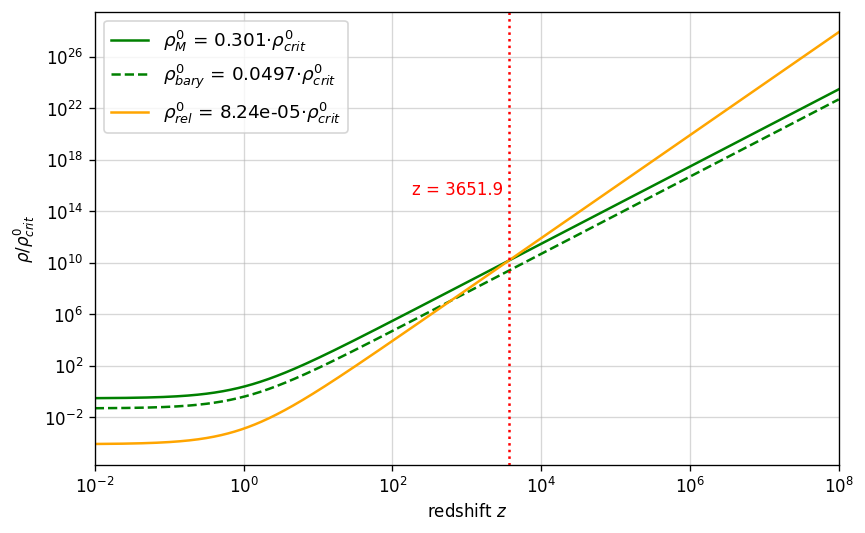

In [5]:
omega_rel = 8.24e-5
rho_rel = omega_rel * rho_crit

def rho_rel_func(z):
    return rho_rel * (1+z)**4


fig = plt.figure(figsize=(8, 5), dpi=120)

z_space = np.logspace(-2, 8, 1000)
z_change = (rho_M / rho_rel) - 1

plt.plot(z_space, rho_M_func(z_space)/rho_crit.value,
         label=r"$\rho_{M}^0$ = " + "{}".format(omega_M) + r"$\cdot \rho_{crit}^0$",
         linestyle="-", color="green")
plt.plot(z_space, rho_bary_func(z_space)/rho_crit.value,
         label=r"$\rho_{bary}^0$ = " + r"{}".format(omega_bary) + r"$\cdot \rho_{crit}^0$",
         linestyle="--", color="green")
plt.plot(z_space, rho_rel_func(z_space)/rho_crit.value,
         label=r"$\rho_{rel}^0$ = " + "{}".format(omega_rel) + r"$\cdot \rho_{crit}^0$",
         linestyle="-", color="orange")
plt.axvline(z_change, linestyle=":", color="red")
plt.annotate("z = {:.1f}".format(z_change), (z_change/20, 2e15), color="red")
plt.xlabel(r"redshift $z$")
plt.ylabel(r"$\rho / \rho_{crit}^0$")
plt.legend(fontsize=11)
plt.loglog(basex=10,basey=10)
plt.grid(alpha=0.5)
plt.xlim(1e-2, 1e8)
plt.show()

# Problem 3: Constrain evolving dark ENERGY

The luminosity distance can be calculate by

$$d_L = (1+z)\frac{c}{H_0} \int\limits_0^z \frac{dz'}{H'(z')}$$

where


$$ H'(z) = \sqrt{\Omega_{DE} \cdot f(z) + \Omega_M (1+z)^3} $$

$f(z)$ captures that the dark energy contribution now evolves with redshift.
From

$$ \frac{d\rho}{\rho} = -3[1+w(a)] = \frac{da}{a} $$

and the new equation of state parameter for a scalar field

$$w(a) = w_0 + w_a(1-a)$$

one obtains

$$\rho(z) = \varrho_0 \cdot (1+z)^{3[1+w_0+w_a]} \cdot \exp\left(\frac{3w_a}{1+z}\right)$$

So

$$f(z) = (1+z)^{3[1+w_0+w_a]} \cdot \exp\left(\frac{3w_a}{1+z}\right)$$

In [6]:
# Numerical integration of luminosity distance as function of redshift z from 0 to z_up
def lum_dist(z_up, omega_M, omega_Lam, w0, wA):
    
    def DE_z_dependence(z):
        return (1+z)**(3 * (1+w0+wA)) * np.exp(-3 * wA * z / (1+z))

            
    def integrand(z):
        return 1 / np.sqrt(omega_M * (1+z)**3
                           + omega_Lam * DE_z_dependence(z))

    integral, err_estim = quad(integrand, 0, z_up)
    
    pre_factor = const.c.to("km/s").value / cosmo.H0.value * (1+z_up)
    
    return pre_factor * integral

# Distance modulus for luminosity distance thats given in Mpc
def dist_modulus(d):
  return 5 * np.log10(d*(10**6) / 10)

In [7]:
# Calculate for different redshifts the from the model expected distance modulus
z_min, z_max = 0.01, 1
N = 1000
z_space = np.linspace(z_min, z_max, N)

# Dark energy is constant
LCDM_lum_dist = []
for i in range(N):
  z = z_space[i]
  d = lum_dist(z, 0.3, 0.7, -1, 0)
  LCDM_lum_dist.append(d)
LCDM_lum_dist = np.array(LCDM_lum_dist)

# Dark energy is scalar field
Scalar_field_lum_dist = []
for i in range(N):
  z = z_space[i]
  d = lum_dist(z, 0.3, 0.7, -1, 1)
  Scalar_field_lum_dist.append(d)
Scalar_field_lum_dist = np.array(Scalar_field_lum_dist)

# Expected distance modulus for z=0.7
mu_07_LCDM = dist_modulus(lum_dist(0.7, 0.3, 0.7, -1, 0))
mu_07_Scalar_field = dist_modulus(lum_dist(0.7, 0.3, 0.7, -1, 1))
delta_mu = abs(mu_07_LCDM - mu_07_Scalar_field)

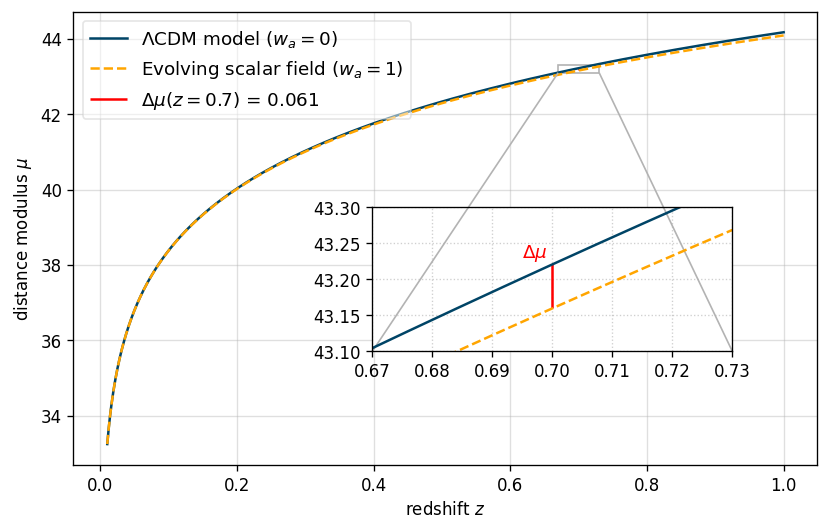

In [8]:
#Plot both models
from mpl_toolkits.axes_grid1.inset_locator import mark_inset, inset_axes

fig = plt.figure(figsize=(8, 5), dpi=120)
ax = plt.subplot(1, 1, 1)

ax.plot(z_space, dist_modulus(LCDM_lum_dist),
         label=r"$\Lambda$CDM model $(w_a = 0)$",
         linestyle="-", color="#004466")
ax.plot(z_space, dist_modulus(Scalar_field_lum_dist),
         label=r"Evolving scalar field $(w_a = 1)$",
         linestyle="--", color="orange")
plt.vlines(0.7, mu_07_Scalar_field, mu_07_LCDM,
           label=(r"$\Delta \mu (z = 0.7)$ = " + "{:.3f}".format(delta_mu)),
           linestyle="-", color="red")


axins = inset_axes(ax, 3, 1.2, loc = 'lower right', bbox_to_anchor=(0.82, 0.3),
                   bbox_transform = ax.figure.transFigure)
axins.plot(z_space, dist_modulus(LCDM_lum_dist), linestyle="-",
           color="#004466")
axins.plot(z_space, dist_modulus(Scalar_field_lum_dist),
           linestyle="--", color="orange")
axins.vlines(0.7, mu_07_Scalar_field, mu_07_LCDM,
           linestyle="-", color="red")
axins.annotate(r"$\Delta \mu$", (0.695, 43.23), color="red", fontsize=11)
x1, x2 = 0.67, 0.73
y1, y2 = 43.1, 43.3
#Setting the limit of x and y direction to define which portion to #zoom
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.grid(alpha=0.6, linestyle=":")
#Draw the lines from the portion to zoom and the zoom window
mark_inset(ax, axins, loc1=3, loc2=4, fc="none", ec = "0.7")

ax.set_xlabel(r"redshift $z$")
ax.set_ylabel(r"distance modulus $\mu$")
ax.legend(fontsize=11, loc="upper left", framealpha=0.5)
ax.grid(alpha=0.4)

plt.show()

In [9]:
# Compare values of numerical calculation with model from astropy library
cosmo = FlatLambdaCDM(H0=cosmo.H0, Om0=0.3)
mu_07 = dist_modulus(cosmo.luminosity_distance(0.7).value)
print("astropy mu(z=0.7) =", mu_07)

mu_07_LCDM = dist_modulus(lum_dist(0.7, 0.3, 0.7, -1, 0))
print("my model mu(z=0.7) =", mu_07_LCDM)

astropy mu(z=0.7) = 43.22072603208119
my model mu(z=0.7) = 43.220726032081174


# Problem 4: Does dark energy exist?


In [10]:
# Read "P4_supernova_distances"

SN_data = pd.read_csv("P4_supernova_distances.txt", delim_whitespace=True)
"""SN_data = pd.read_csv("P4_supernova_distances.dat", sep=r"\s+", skiprows=49,
                      names=["Name", "zcmb", "mb(mag)", "e_mb(mag)",
                             "x1", "e_x1", "c", "e_c"], skipfooter=1)"""

SN_data = SN_data.sort_values("zcmb", ascending=True)

z_cmb = SN_data["zcmb"] # redshift in CMB frame

mb0 = SN_data["mb(mag)"] # peak luminosity mb0
mb0_err = SN_data["e_mb(mag)"] # error peak luminosity mb0_err

x1 = SN_data["x1"] # lightcurve width x1
x1_err = SN_data["e_x1"] # error lightcurve width x1_err

col = SN_data["c"] # color  c 
col_err = SN_data["e_c"] # error of color c_err

sigma_int = 0.14 # intrinsic dispersion

#SN_data.head()
#SN_data.describe()

Functions

In [11]:
# Distance modulus for a cosmological model (omega_M and omega_DE) and reshift value
# Model: flat (k=0) and no radiation (omega_R =0)
def dist_modulus_model(z, omega_M, omega_DE):

    # Caluclate luminosty numerically according to model   
    def integrand(z):
        return 1 / np.sqrt(omega_M * (1+z)**3 + omega_DE)

    integral = np.array([quad(integrand, 0, z1)[0] for z1 in z])

    pre_factor = const.c.to("km/s").value / cosmo.H0.value * (1+z)
    
    # Luminosity distance
    dL =  pre_factor * integral # in Mpc
    
    # Distance modulus
    mu = dist_modulus(dL)

    return mu

# Calculate chi-squared for fixed nuisance parameters
def chi_squared(params):
  omega_M, omega_DE = params
  mu_predicted = dist_modulus_model(z_cmb, omega_M, omega_DE)
  chi_sq = np.sum((mu_predicted-mu_data)**2 / (2*mu_data_err**2))
  return chi_sq

# Calculate chi-squared for varying nuisance parameters
def chi_squared_nuisance(params):
  omega_M, omega_DE, alpha, beta, M0 = params
  mu_data = mb0 - (x1 * alpha) + (col * beta) - M0
  mu_data_err = np.sqrt(mb0_err**2 + (alpha * x1_err)**2 +
                        (beta * col_err)**2 + sigma_int**2)

  mu_predicted = dist_modulus_model(z_cmb, omega_M, omega_DE)
  chi_sq = np.sum((mu_predicted-mu_data)**2 / (2*mu_data_err**2))
  return chi_sq

# Distance modulus for luminosity distance thats given in Mpc
def dist_modulus(d):
  return 5 * np.log10(d*(10**6) / 10)

## i)

- Continous distribution of dust in the intergalactic medium:

Check if characteristic absorption lines (e.g. hydrogen 21cm) are present in the observed spectra. If SNs have sufficient emissions at much different wavelengths than the those of the spectra we used, one could compare how this part of the SN spectra behaves as the dust probably has different absorption properties for the different wavelengths.


- Evolution of supernovae porperties with time:

One take a look at other cosmic objects/events with known properties and compare if their observed brightness behaves over distance/time like the supernovae signals. If they do behave similar, that could point to effects that are not tied to the SN properties.

Unfortunately time, color and brightness for observations of any class of objects are correlated, i.e. more distant objects are always older, redder and fainter. So finding similar behavior could as well be caused by instrumental non-linearities instead.


- Instrument non-linearities bright/faint or red/blue:

Check if a second independently developed experiment/device produces the same brightness/color behavior.

## ii)

In [12]:
# Calculate p-value for fixed nuisance parameters
alpha, beta, M0 = -0.15, -3, -19

# Calculate distance modulus mu and its error from measurement for set of nuisance paramaters
mu_data = mb0 - (x1 * alpha) + (col * beta) - M0
mu_data_err = np.sqrt(mb0_err**2 + (alpha * x1_err)**2 +
                      (beta * col_err)**2 + sigma_int**2)

# With dark energy
params_1 = (0.3, 0.7, -0.15, -3, -19)

# No dark energy
params_2 = (0.3, 0, -0.15, -3, -19)

chi_1 = chi_squared_nuisance(params_1)
chi_2 = chi_squared_nuisance(params_2)
print(r"With dark energy: chi_sq1 =$", chi_1)
print(r"No dark energy: chi_sq2 =", chi_2)

n_dof = len(z_cmb) - len(params_1)
p_value_1 = 1.0 - chi2.cdf(chi_1, n_dof)
p_value_2 = 1.0 - chi2.cdf(chi_2, n_dof)

print("n degrees of freedom", n_dof)
print("With dark energy: p1 =", p_value_1)
print("No dark energy: p2 =", p_value_2)
print("Ratio p2/p1, ", p_value_2/p_value_1)

With dark energy: chi_sq1 =$ 362.6107589884624
No dark energy: chi_sq2 = 11744.90492810577
n degrees of freedom 735
With dark energy: p1 = 1.0
No dark energy: p2 = 0.0
Ratio p2/p1,  0.0


The p-values show that the model including dark energy is much more likely to describe the data than the other model without dark energy.

## iii)
Find best fit values for $\Omega_{M}$ and $\Omega_{DE}$

for fixed $\alpha, \beta, M_0$

In [13]:
alpha, beta, M0 = -0.15, -3, -19

# Calculate distance modulus mu and its error from measurement for set of nuisance paramaters
mu_data = mb0 - (x1 * alpha) + (col * beta) - M0
mu_data_err = np.sqrt(mb0_err**2 + (alpha * x1_err)**2 +
                      (beta * col_err)**2 + sigma_int**2)

# Fit supernovae data with scipy.optimize.curve_fit
p0 = [0.3, 0.7]
bounds = (0.0, 10)

popt, pcov = curve_fit(dist_modulus_model, z_cmb, mu_data, p0=p0,
                       sigma=mu_data_err, bounds=bounds)
  # print(popt)
  # print(pcov)

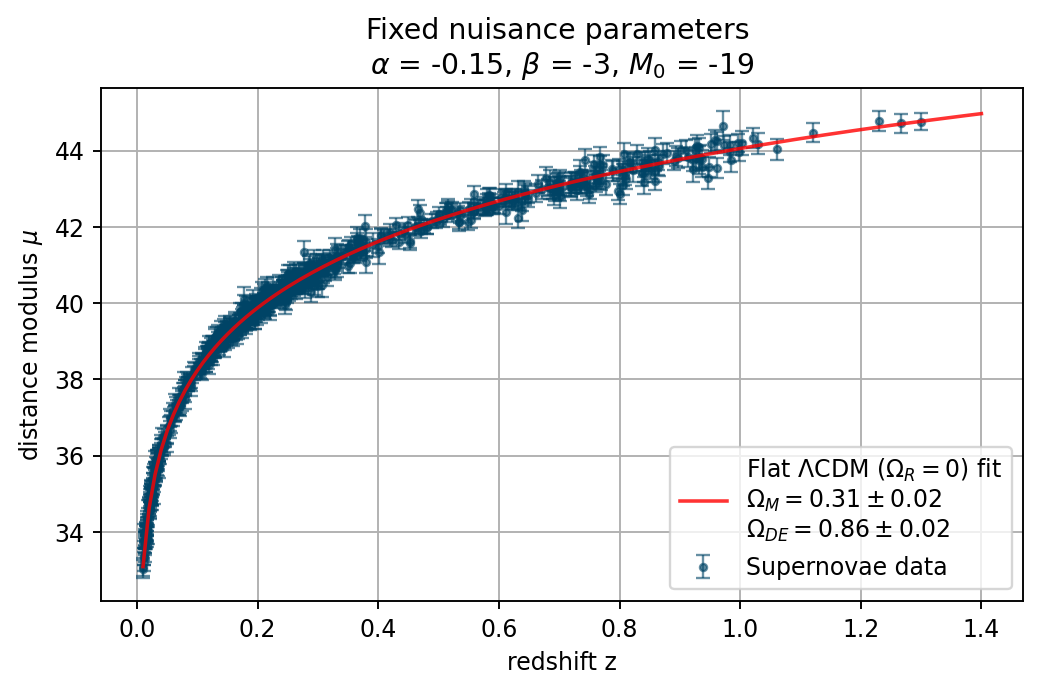

In [14]:
# Plot best fit
fig = plt.figure(figsize=(7, 4), dpi=170)

z_space = np.arange(0.01, 1.41, 0.01)
mu_fit = dist_modulus_model(z_space, popt[0], popt[1])

plt.title("Fixed nuisance parameters \n" + r"$\alpha$ = -0.15, $\beta$ = -3, $M_0$ = -19")
plt.xlabel("redshift z")
plt.ylabel(r"distance modulus $\mu$")

label = ("Flat $\Lambda$CDM ($\Omega_{R}=0$) fit\n"
         + "$\Omega_M = {:.2f} \pm {:.2f}$".format(popt[0], np.sqrt(pcov[0][0]))
         + "\n"
         + "$\Omega_{DE}"
         + "= {:.2f} \pm {:.2f}$".format(popt[1], np.sqrt(pcov[1][1])))
plt.plot(z_space, mu_fit, color="red", label=label, zorder=2.5, alpha=0.8)

plt.errorbar(z_cmb, mu_data, yerr = mu_data_err,
             elinewidth=1, capsize=3, fmt='.',
             alpha = 0.6, label='Supernovae data', color="#004466")

plt.legend(loc="best")
plt.grid()
plt.show()

 ## iv)

In [15]:
# Minimize chi_square for fixed nuisance parameters
alpha, beta, M0 = -0.15, -3, -19
mu_data = mb0 - (x1 * alpha) + (col * beta) - M0
mu_data_err = np.sqrt(mb0_err**2 + (alpha * x1_err)**2 +
                      (beta * col_err)**2 + sigma_int**2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  if __name__ == '__main__':


      fun: 191.05770988286062
 hess_inv: array([[ 0.00020733, -0.00034816],
       [-0.00034816,  0.00068145]])
      jac: array([ 9.53674316e-06, -1.33514404e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 203
      nit: 12
     njev: 48
   status: 2
  success: False
        x: array([0.30846722, 0.85560366])


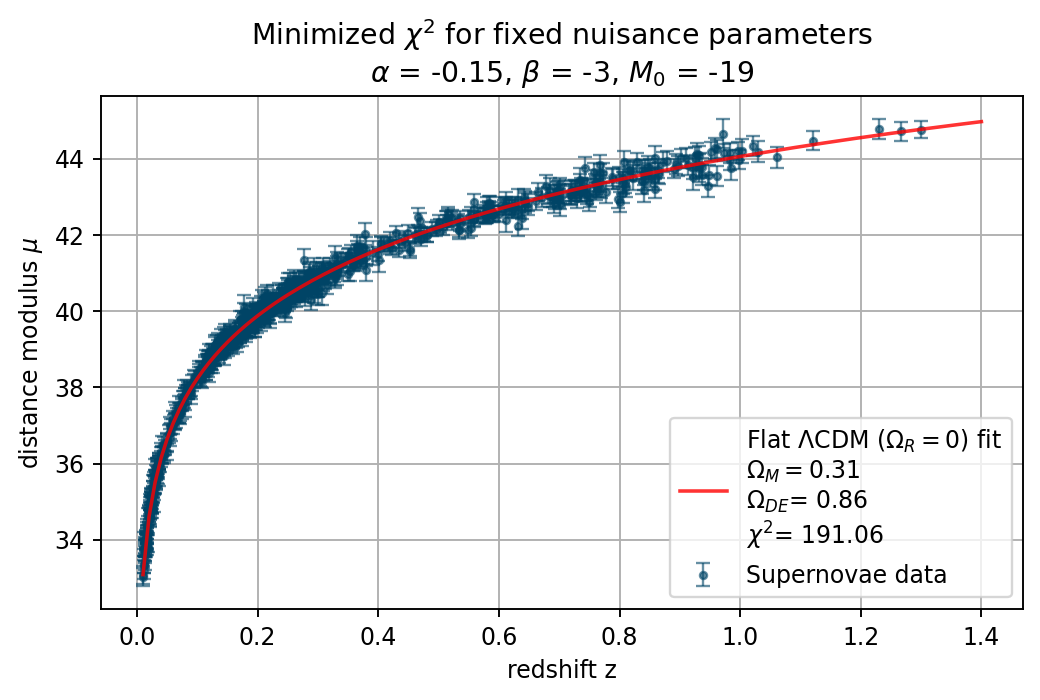

In [17]:
params = (0.3, 0.7) #omega_M, omega_DE
result = minimize(chi_squared, params)
print(result)

fig = plt.figure(figsize=(7, 4), dpi=170)

z_space = np.arange(0.01, 1.41, 0.01)
mu_chi = dist_modulus_model(z_space, result.x[0], result.x[1])

plt.title(r"Minimized $\chi^2$ for fixed nuisance parameters" + "\n" + r"$\alpha$ = -0.15, $\beta$ = -3, $M_0$ = -19")
plt.xlabel("redshift z")
plt.ylabel(r"distance modulus $\mu$")

label = ("Flat $\Lambda$CDM ($\Omega_{R}=0$) fit\n"
         + "$\Omega_M = {:.2f}$".format(result.x[0])
         + "\n"
         + "$\Omega_{DE}$"
         + "= {:.2f}".format(result.x[1])
         + "\n" + "$\chi^2$"
         + "= {:.2f}".format(result.fun))

plt.plot(z_space, mu_chi, color="red", label=label, zorder=2.5, alpha=0.8)

plt.errorbar(z_cmb, mu_data, yerr = mu_data_err,
             elinewidth=1, capsize=3, fmt='.',
             alpha = 0.6, label='Supernovae data', color="#004466")

plt.legend(loc="best")
plt.grid()
plt.show()

In [18]:
# Minimize chi_square with all parameters
params_nui = (0.3, 0.7, -0.15, -3, -19) #omega_M, omega_DE, alpha, beta, M0
result_nui = minimize(chi_squared_nuisance, params_nui)
print(result_nui)
mu_chi_nui = dist_modulus_model(z_space, result_nui.x[0], result_nui.x[1])

      fun: 187.53982295556273
 hess_inv: array([[ 7.85317423e-04, -6.78174769e-04,  4.55275015e-05,
         7.93412503e-04,  4.20166459e-04],
       [-6.78174769e-04,  3.71669442e-03, -6.26597798e-05,
        -6.95521541e-04,  2.20966111e-03],
       [ 4.55275015e-05, -6.26597798e-05,  7.39075667e-05,
         4.34469540e-05, -8.39028044e-07],
       [ 7.93412503e-04, -6.95521541e-04,  4.34469540e-05,
         1.19888503e-02,  1.25560502e-04],
       [ 4.20166459e-04,  2.20966111e-03, -8.39028044e-07,
         1.25560502e-04,  2.36332551e-03]])
      jac: array([ 1.04331970e-03,  6.69479370e-04,  9.53674316e-06,  2.09808350e-05,
       -7.38143921e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 740
      nit: 11
     njev: 104
   status: 2
  success: False
        x: array([  0.37531847,   0.96943839,  -0.12788058,  -2.9262601 ,
       -18.83981809])


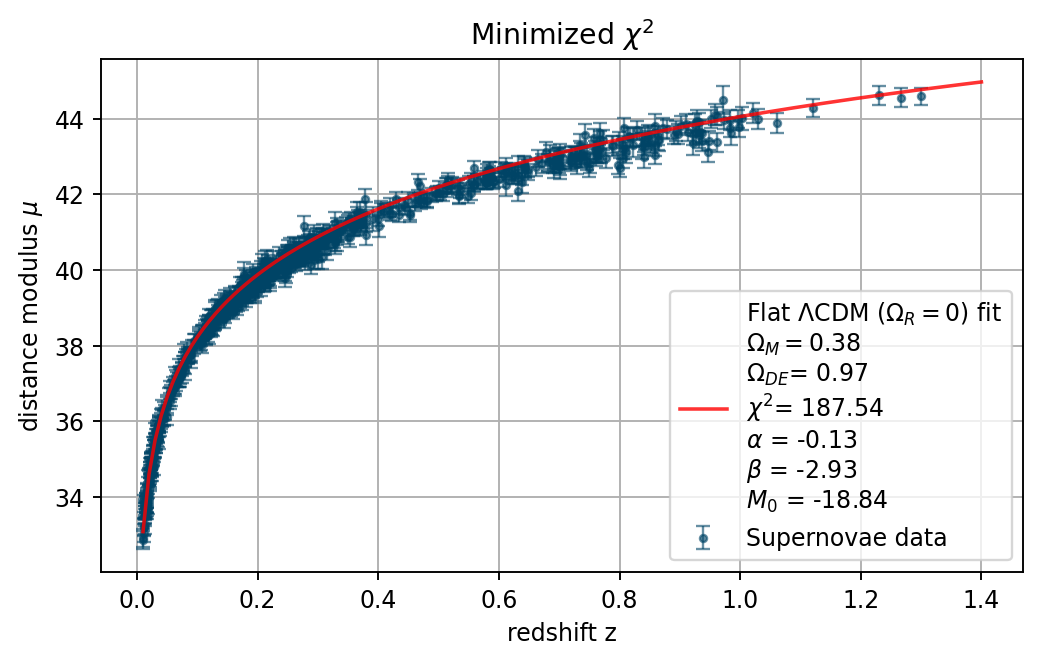

In [20]:
fig = plt.figure(figsize=(7, 4), dpi=170)

alpha, beta, M0 =  result_nui.x[2], result_nui.x[3], result_nui.x[4]

mu_data = mb0 - (x1 * alpha) + (col * beta) - M0
mu_data_err = np.sqrt(mb0_err**2 + (alpha * x1_err)**2 +
                      (beta * col_err)**2 + sigma_int**2)

z_space = np.arange(0.01, 1.41, 0.01)
mu_chi = dist_modulus_model(z_space, result.x[0], result.x[1])
mu_chi_nui = dist_modulus_model(z_space, result_nui.x[0], result_nui.x[1])

plt.title(r"Minimized $\chi^2$")
          
plt.xlabel("redshift z")
plt.ylabel(r"distance modulus $\mu$") 

label = ("Flat $\Lambda$CDM ($\Omega_{R}=0$) fit\n"
         + "$\Omega_M = {:.2f}$".format(result_nui.x[0])
         + "\n"
         + "$\Omega_{DE}$"
         + "= {:.2f}".format(result_nui.x[1])
         + "\n" + "$\chi^2$"
         + "= {:.2f}".format(result_nui.fun)
         + "\n" + r"$\alpha$ = " + "{:.2f}".format(alpha)
         + "\n" + r"$\beta$ = " + "{:.2f}".format(beta)
         + "\n" + r"$M_0$ = " + "{:.2f}".format(M0))


plt.plot(z_space, mu_chi, color="red", label=label, zorder=2.5, alpha=0.8)

plt.errorbar(z_cmb, mu_data, yerr = mu_data_err,
             elinewidth=1, capsize=3, fmt='.',
             alpha = 0.6, label='Supernovae data', color="#004466")

plt.legend(loc="best")
plt.grid()
plt.show()

## v)

In [21]:
# Calculate chi_square for different combinations of omega_M and omega_DE
low_M, high_M = 0, 1
low_DE, high_DE = 0, 1

# Fixed nuisance parameters
alpha, beta, M0 = -0.15, -3, -19

# Calculate distance modulus mu and its error from measurement for set of nuisance paramaters
mu_data = mb0 - (x1 * alpha) + (col * beta) - M0
mu_data_err = np.sqrt(mb0_err**2 + (alpha * x1_err)**2 +
                      (beta * col_err)**2 + sigma_int**2)

M=30
omega_M_list = np.linspace(low_M, high_M, M)
omega_DE_list = np.linspace(low_DE, high_DE, M)

X_M, Y_DE = np.meshgrid(omega_M_list, omega_DE_list)

chi_sq_grid = np.zeros((len(omega_M_list), len(omega_DE_list)))
#print(chi_sq_grid)
for m in range(len(omega_M_list)):
  for de in range(len(omega_DE_list)):
    omega_M, omega_DE = omega_M_list[m], omega_DE_list[de]
    chi_sq = chi_squared((omega_M, omega_DE))
    chi_sq_grid[de, m] = chi_sq

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys


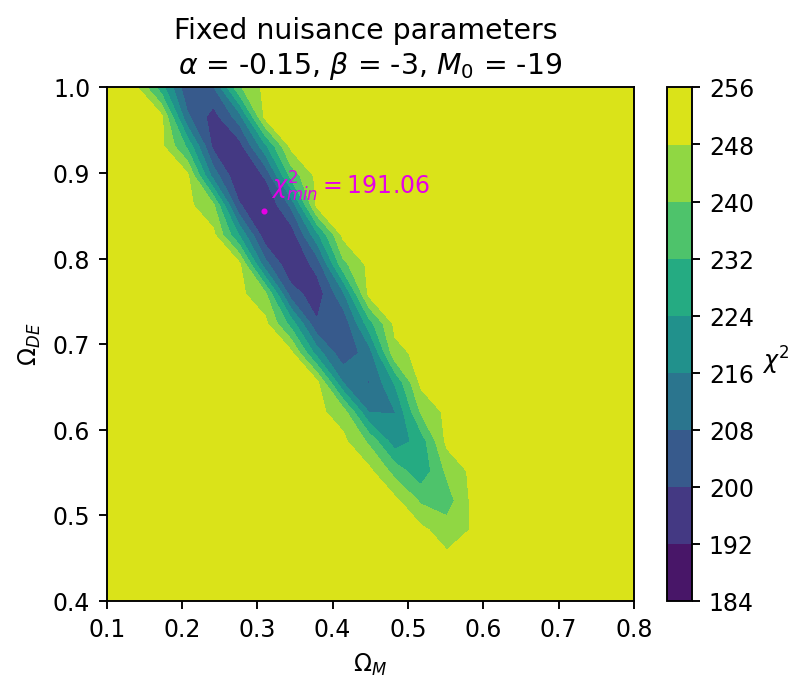

In [22]:
chi_sq_grid2 = np.copy(chi_sq_grid)

# Discard high values
chi_sq_grid2[chi_sq_grid2 > 250] = 250

# Contour plot
fig = plt.figure(figsize=(5, 4), dpi=170)

plt.title("Fixed nuisance parameters \n" + r"$\alpha$ = -0.15, $\beta$ = -3, $M_0$ = -19")
temp = plt.contourf(X_M, Y_DE, chi_sq_grid2, zorder=1)
cbar = plt.colorbar(temp)
cbar.set_label(r'$\chi^2$', rotation=0, labelpad=9)
plt.xlabel(r"$\Omega_M$")
plt.ylabel(r"$\Omega_{DE}$")
plt.scatter(result.x[0], result.x[1], color="#E600E6", marker=".", s=10)
plt.annotate("$\chi^2_{min} = $" + "{:.2f}".format(result.fun),
             (result.x[0]+0.01, result.x[1]+0.02), color="#E600E6")
plt.ylim(0.4, 1)
plt.xlim(0.1, 0.8)
plt.show()